In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/base_datos_2008.csv")
df.dropna(inplace = True, subset = ["ArrDelay", "DepDelay", "Distance", "AirTime"])

# Ajustamos el tamaño del gráfico
sns.set(rc = {'figure.figsize': (15,10)})

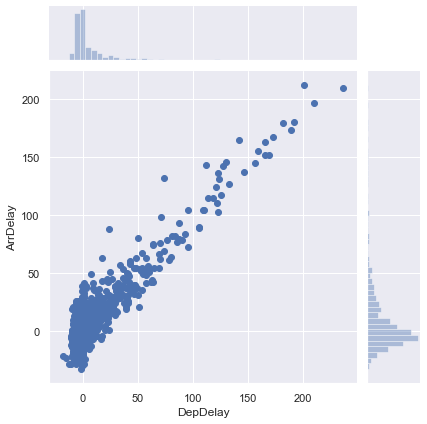

In [2]:
# Creo un subset con el conjunto de datos que voy a utilizar, escogemos de forma desordenada 1000 vuelos con punto de partida
# los aeropuertos de ATL, HOU, IND

df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])].sample(frac = 1).head(1000)

# Usamos la instrucción jointplot para mostrar una nube de puntos.

sns.jointplot(df2["DepDelay"], df2["ArrDelay"])

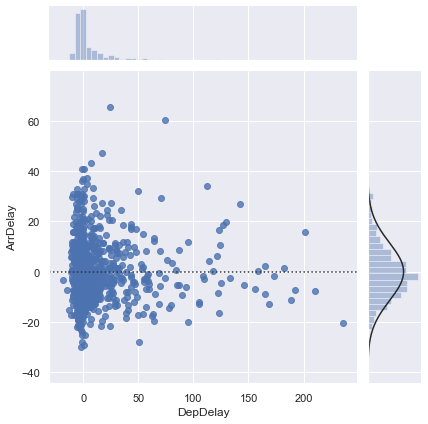

In [3]:
# La visualización que tenemos no despeja muchas dudas... Así que vamos a profundizar un poco más.

# Creamos un nuevo subconjunto de datos. Cogeremos los vuelos que se han retrasado en la llegado o en la salida menos de 40 min.
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

sns.jointplot(df2["DepDelay"], df2["ArrDelay"], kind = "resid")

# kind { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional

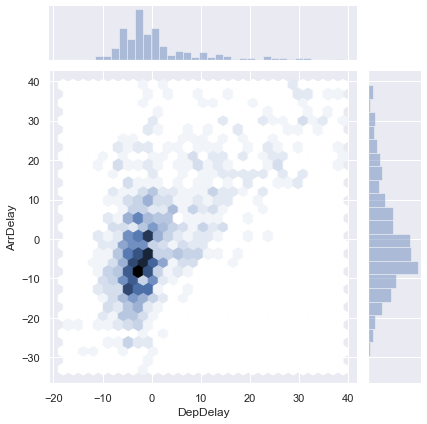

In [4]:
sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind = "hex")

In [1]:
# Utilizamos df2
sns.jointplot(df2["DepDelay"], df2["ArrDelay"], kind = "kde", xlim = ([-100, 100]), ylim = ([-100, 100]))

NameError: name 'sns' is not defined

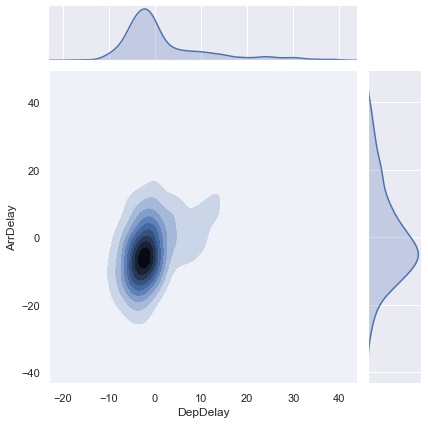

In [6]:
# Plot de densidad y curvas de nivel con df3

sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind = "kde")

In [8]:
# Vemos ahora las curvas de calor, sobre el df2, no queremos que sean indexadas, y vamos a ver el retraso medio de llegada.

gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index=False)["DepDelay"].mean())

# Solo se muestran los cinco primeros registros.
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,7.370968
1,ATL,2,10.114754
2,ATL,3,13.209677
3,ATL,4,10.067797
4,ATL,5,10.147059


In [9]:
# Para cada aeropuerto y cada mes tenemos una media.
data = gb_df.pivot ("Month", "Origin", "DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,7.370968,-0.111111,-5.714286
2,10.114754,33.700000,8.000000
3,13.209677,47.230769,28.000000
4,10.067797,19.000000,7.125000
5,10.147059,22.888889,2.250000
6,5.074627,15.272727,-2.400000
7,21.057471,11.666667,11.181818
8,15.117647,13.000000,15.000000
9,2.063492,5.100000,0.000000


In [4]:
# Ahora convertimos la tabla en un gráfico.
sns.set(rc={'figure.figsize': (15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5)

# Vemos los retrasos que tenemos por aeropuerto y mes.

NameError: name 'sns' is not defined